
<h1 
   style='background-color:#4b5320;
          text-align:center;
          color:#f0f8ff;
          text-decoration:underline'>
    Pengiuns Dataset
</h1>

<!-- <img src="![image.png](attachment:image.png)" width=500 height=300 style='margin-top: 1px'> -->
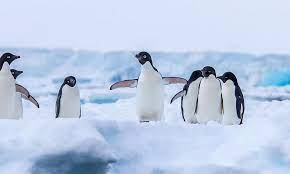

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis,skew

import warnings
warnings.filterwarnings("ignore")

In [2]:
pg=pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/penguins.csv').dropna()

In [3]:
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [4]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [5]:
pg.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<p style='text-align:center;
          color:	#f2f3f4;
          font-size:20px;
          background-color:#8db600'>
    Label Encoding
                         </p></div>

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
LE=LabelEncoder()
pg['sex']=LE.fit_transform(pg['sex'])
pg['sex'].value_counts()

1    168
0    165
Name: sex, dtype: int64

In [8]:
pg.species=LE.fit_transform(pg['species'])

X & Y

In [9]:
x,y=pg.iloc[:,1:],pg['species']

In [10]:
x.shape

(333, 6)

In [11]:
y.shape

(333,)

In [12]:
y.value_counts()

0    146
2    119
1     68
Name: species, dtype: int64

<p> OneHotEncoding</p>

In [13]:
x.island.value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

<p style='text-align:center;
          color:	#f2f3f4;
          font-size:20px;
          background-color:#8db600;
          '>OneHotEncoding</p>

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
ohe=OneHotEncoder(handle_unknown='ignore',sparse=False)
island=pd.DataFrame(ohe.fit_transform(x[['island']]),columns=['Biscoe_island','Dream_island','Torgersen_island'])

In [16]:
x['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [17]:
ohe.categories_

[array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)]

In [42]:
ohe.inverse_transform([[0,1,0]])

array([['Dream']], dtype=object)

In [19]:
df=pd.concat([island,x],axis=1,join='inner').drop('island',axis=1)
df.head()

,Biscoe_island,Dream_island,Torgersen_island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,0.0,1.0,39.1,18.7,181.0,3750.0,1
1,0.0,0.0,1.0,39.5,17.4,186.0,3800.0,0
2,0.0,0.0,1.0,40.3,18.0,195.0,3250.0,0
4,0.0,0.0,1.0,36.7,19.3,193.0,3450.0,0
5,0.0,0.0,1.0,39.3,20.6,190.0,3650.0,1


<p style='color:#ff033e;font-size:20px'><em> pd.get_dummies</em></p>

In [20]:
df2=pd.get_dummies(x)
df2.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,1


<p style='color:	#f2f3f4;
          background-color:	#a4c639;
          font-size:20px;
          text-align:center' >Scaling</p>

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
df.columns

Index(['Biscoe_island', 'Dream_island', 'Torgersen_island', 'bill_length_mm',
       'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [23]:
sc=StandardScaler()
Xscl=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [24]:
Xscl

,Biscoe_island,Dream_island,Torgersen_island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.981650,-0.782266,2.591194,-0.872377,0.755911,-1.410034,-0.540325,0.993846
1,-0.981650,-0.782266,2.591194,-0.798966,0.092737,-1.047627,-0.476941,-1.006192
2,-0.981650,-0.782266,2.591194,-0.652144,0.398817,-0.395293,-1.174160,-1.006192
3,-0.981650,-0.782266,2.591194,-1.312842,1.061991,-0.540256,-0.920626,-1.006192
4,-0.981650,-0.782266,2.591194,-0.835671,1.725165,-0.757701,-0.667092,0.993846
...,...,...,...,...,...,...,...,...
319,1.018693,-0.782266,-0.385922,-0.101563,-1.641717,0.546967,0.505503,-1.006192
320,1.018693,-0.782266,-0.385922,0.779367,-1.080570,0.619449,1.678098,0.993846
321,1.018693,-0.782266,-0.385922,1.219832,-1.029557,1.126819,1.044263,-1.006192
322,1.018693,-0.782266,-0.385922,1.091363,-0.672463,2.069080,2.248549,0.993846


<p> Isolation Forest</p>

In [25]:
from sklearn.ensemble import IsolationForest

In [45]:
isf=IsolationForest(random_state=40,contamination=0.1)
isf.fit_predict(Xscl) #df.drop('species',axis=1)

array([ 1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [27]:
Xscl['scores']=isf.decision_function(Xscl) #df['scores'] df.drop('species',axis=1)

In [28]:
Xscl['anomaly']=isf.fit_predict(Xscl)

In [47]:
x=list(Xscl[Xscl['anomaly']==-1].index)
for i in x:
    print(pg[['species']].iloc[i])

species    0
Name: 2, dtype: int32
species    0
Name: 4, dtype: int32
species    0
Name: 7, dtype: int32
species    0
Name: 12, dtype: int32
species    0
Name: 13, dtype: int32
species    0
Name: 14, dtype: int32
species    0
Name: 19, dtype: int32
species    0
Name: 20, dtype: int32
species    0
Name: 28, dtype: int32
species    0
Name: 64, dtype: int32
species    0
Name: 66, dtype: int32
species    0
Name: 70, dtype: int32
species    0
Name: 77, dtype: int32
species    0
Name: 98, dtype: int32
species    0
Name: 110, dtype: int32
species    0
Name: 111, dtype: int32
species    0
Name: 114, dtype: int32
species    0
Name: 116, dtype: int32
species    0
Name: 117, dtype: int32
species    0
Name: 121, dtype: int32
species    0
Name: 122, dtype: int32
species    0
Name: 124, dtype: int32
species    0
Name: 142, dtype: int32
species    1
Name: 169, dtype: int32
species    1
Name: 183, dtype: int32
species    1
Name: 189, dtype: int32
species    1
Name: 190, dtype: int32
species    1
Name:

In [30]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import matplotlib.pyplot as plt

In [31]:
data=pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/penguins.csv').dropna()

In [32]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [33]:
le=LabelEncoder()

In [34]:
data.species=le.fit_transform(data.species)

In [35]:
data.island.value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [36]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,0,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,0,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,0,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,0,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [37]:
data[data['island']=='Torgersen'].value_counts()

species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
0        Torgersen  33.5            19.0           190.0              3600.0       FEMALE    1
                    41.1            18.6           189.0              3325.0       MALE      1
                    39.3            20.6           190.0              3650.0       MALE      1
                    39.5            17.4           186.0              3800.0       FEMALE    1
                    39.6            17.2           196.0              3550.0       FEMALE    1
                    39.7            18.4           190.0              3900.0       MALE      1
                    40.2            17.0           176.0              3450.0       FEMALE    1
                    40.3            18.0           195.0              3250.0       FEMALE    1
                    40.6            19.0           199.0              4000.0       MALE      1
                    40.9            16.8           191.

In [38]:
df=pd.get_dummies(data)
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,0,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,0,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,0,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,0,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [39]:
tsne=TSNE()
x=pd.DataFrame(tsne.fit_transform(df.iloc[:,1:]))

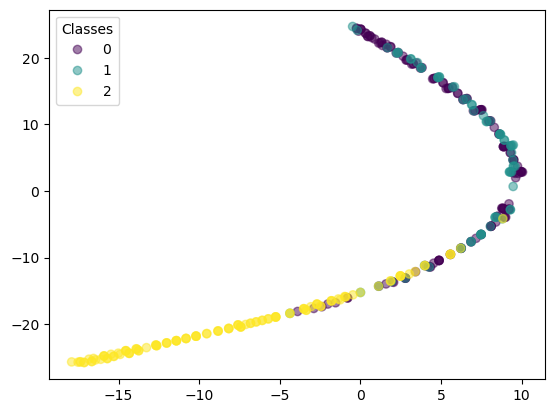

In [40]:
scatter=plt.scatter(x.iloc[:,0],x.iloc[:,1],c=df.iloc[:,0],alpha=0.5)
plt.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
plt.show()

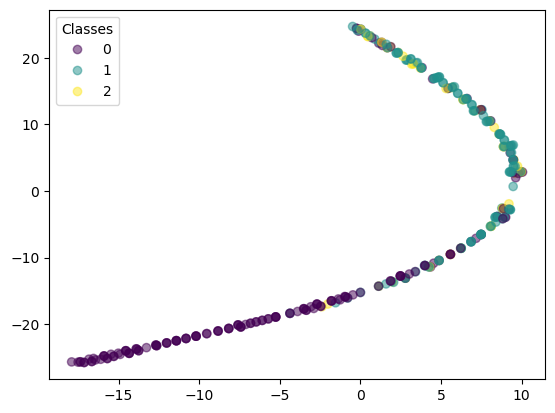

In [41]:

scatter=plt.scatter(x.iloc[:,0],x.iloc[:,1],c=le.fit_transform(data.island),alpha=0.5)
plt.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
plt.show()